In [1]:
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras 


Defaulting to user installation because normal site-packages is not writeable


In [3]:
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255

X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

60000 train samples
10000 test samples


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_1 = Sequential()


model_1.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))

In [7]:
model_1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 1.0839 - accuracy: 0.7496 - val_loss: 0.6535 - val_accuracy: 0.8577
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.6060 - accuracy: 0.8575 - val_loss: 0.5068 - val_accuracy: 0.8777
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.5112 - accuracy: 0.8715 - val_loss: 0.4495 - val_accuracy: 0.8888
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.4654 - accuracy: 0.8791 - val_loss: 0.4173 - val_accuracy: 0.8934
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.4370 - accuracy: 0.8838 - val_loss: 0.3968 - val_accuracy: 0.8962


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


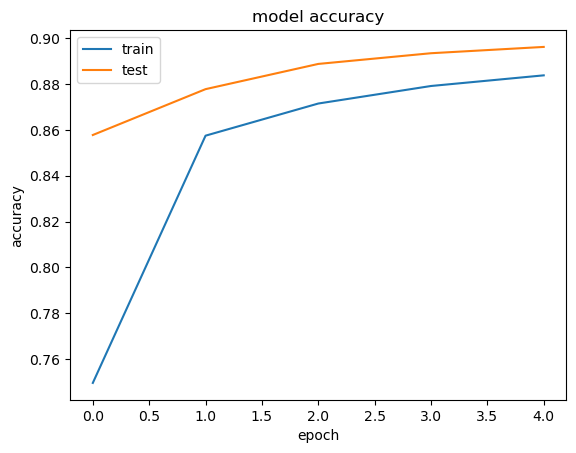

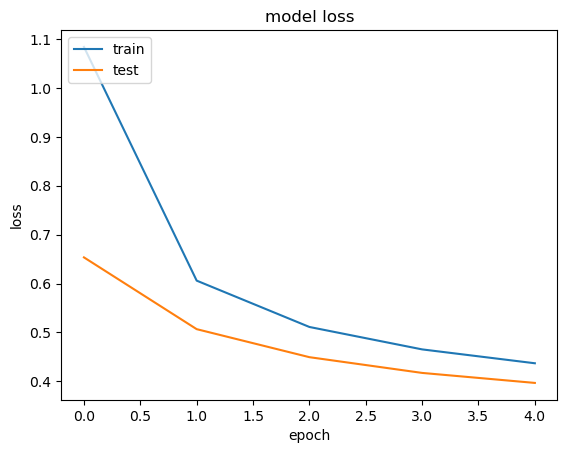

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


print(training.history.keys())


plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8974
Test accuracy: 0.8974000215530396


In [11]:
model_1.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'buil

In [12]:
model_2 = tf.keras.Sequential()
N_hidden = 64


model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))


model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


model_2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


training = model_2.fit(X_train, Y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 1.1220 - accuracy: 0.7054 - val_loss: 0.4912 - val_accuracy: 0.8702
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4298 - accuracy: 0.8830 - val_loss: 0.3513 - val_accuracy: 0.9010
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3464 - accuracy: 0.9021 - val_loss: 0.3078 - val_accuracy: 0.9097
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.3081 - accuracy: 0.9120 - val_loss: 0.2817 - val_accuracy: 0.9172
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2836 - accuracy: 0.9186 - val_loss: 0.2628 - val_accuracy: 0.9227
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2648 - accuracy: 0.9239 - val_loss: 0.2477 - val_accuracy: 0.9263
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2494 - accuracy: 0.9289 - val_loss: 0.2341 - val_accuracy: 0.9333
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


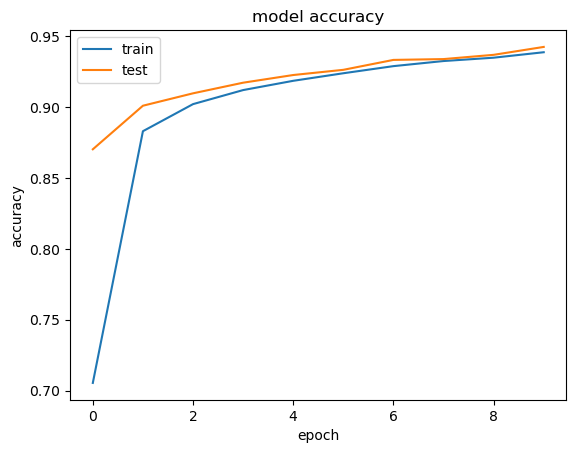

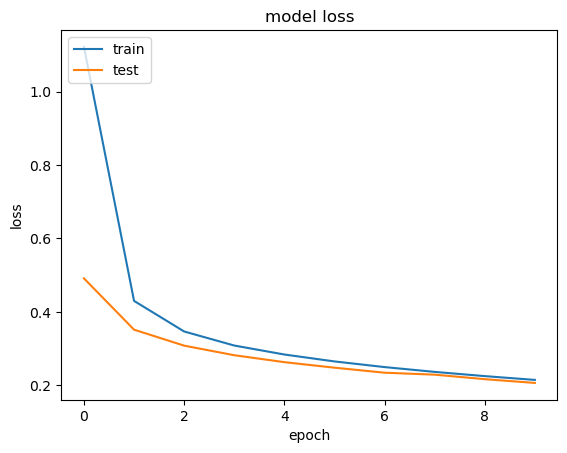

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3984 - accuracy: 0.8974
Test accuracy: 0.8974000215530396


In [15]:
from tensorflow.keras.layers import Dropout


model_3 = tf.keras.Sequential()
N_hidden = 128


model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))


model_3.add(Dropout(0.3))


model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))


model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


model_3.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


training = model_3.fit(X_train, Y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 6s 7ms/step - loss: 1.3279 - accuracy: 0.5794 - val_loss: 0.5492 - val_accuracy: 0.8656
Epoch 2/5
750/750 [==============================] - 5s 7ms/step - loss: 0.6545 - accuracy: 0.7992 - val_loss: 0.3793 - val_accuracy: 0.8954
Epoch 3/5
750/750 [==============================] - 5s 6ms/step - loss: 0.5197 - accuracy: 0.8441 - val_loss: 0.3226 - val_accuracy: 0.9061
Epoch 4/5
750/750 [==============================] - 5s 7ms/step - loss: 0.4529 - accuracy: 0.8655 - val_loss: 0.2865 - val_accuracy: 0.9149
Epoch 5/5
750/750 [==============================] - 5s 7ms/step - loss: 0.4111 - accuracy: 0.8778 - val_loss: 0.2628 - val_accuracy: 0.9230


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


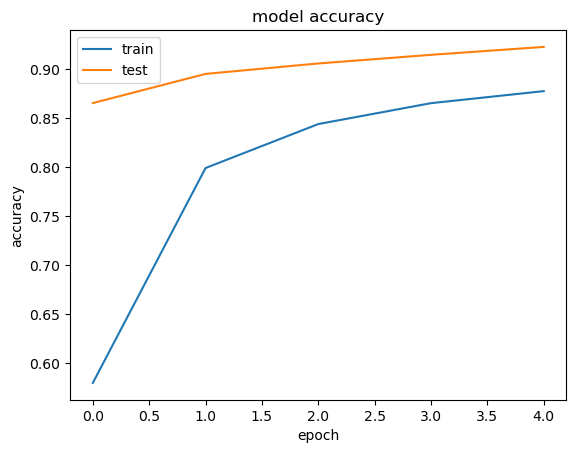

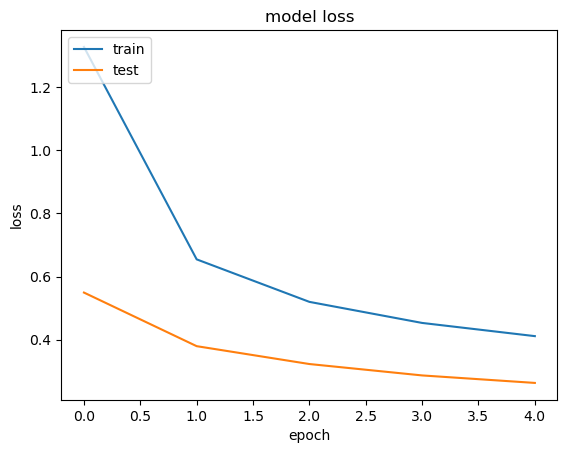

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2064 - accuracy: 0.9402
Test accuracy: 0.9401999711990356


In [18]:
model_4 = tf.keras.Sequential()
N_hidden = 512
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))

model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

model_4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model_4.fit(X_train, Y_train, batch_size=128, epochs=5, validation_split=0.2)


Epoch 1/5
375/375 [==============================] - 12s 29ms/step - loss: 0.3081 - accuracy: 0.9064 - val_loss: 0.1446 - val_accuracy: 0.9573
Epoch 2/5
375/375 [==============================] - 10s 27ms/step - loss: 0.1278 - accuracy: 0.9610 - val_loss: 0.0986 - val_accuracy: 0.9689
Epoch 3/5
375/375 [==============================] - 10s 28ms/step - loss: 0.0908 - accuracy: 0.9717 - val_loss: 0.0823 - val_accuracy: 0.9740
Epoch 4/5
375/375 [==============================] - 11s 31ms/step - loss: 0.0727 - accuracy: 0.9775 - val_loss: 0.0787 - val_accuracy: 0.9762
Epoch 5/5
375/375 [==============================] - 10s 27ms/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.0779 - val_accuracy: 0.9780


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


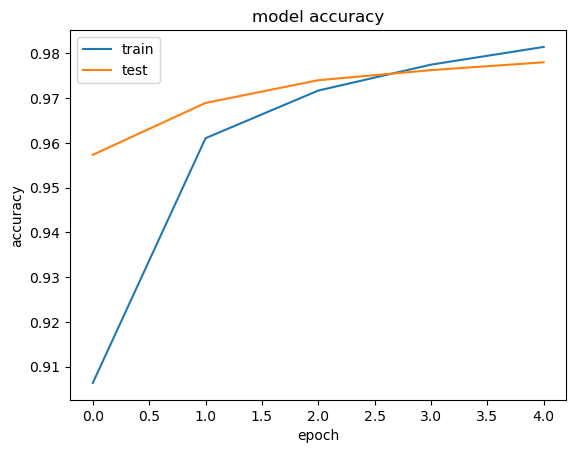

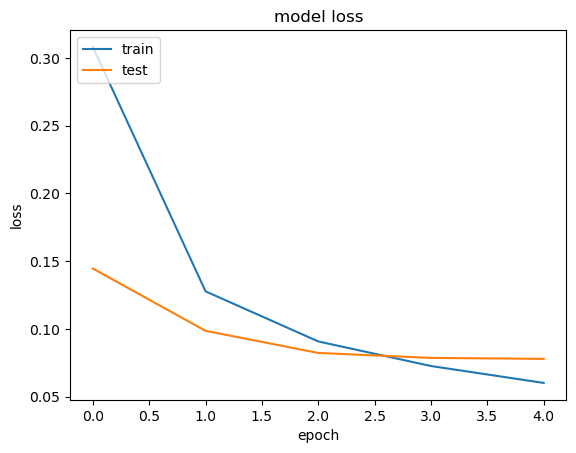

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0702 - accuracy: 0.9779
Test accuracy: 0.9779000282287598
